**Problem 1**

a) I found how many CPU's I had using the terminal command lscpu | grep '^CPU(s)'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def output_to_df(output):
  column_names = [
      "WorkerID",
      "RequestID",
      "ClientRequestTimestamp",
      "ClientRequestLength",
      "ReceiptTimestamp",
      "StartTimestamp",
      "CompletionTimestamp",
  ]

  df = pd.read_csv(output, on_bad_lines='skip', names=column_names)

  return df

def split_by_worker(output):
  column_names = [
      "WorkerID",
      "RequestID",
      "ClientRequestTimestamp",
      "ClientRequestLength",
      "ReceiptTimestamp",
      "StartTimestamp",
      "CompletionTimestamp",
  ]

  data = pd.read_csv(output, on_bad_lines='skip', names=column_names)

  grouped_by_worker_data = data.groupby("WorkerID")

  dfs = {worker_id: group for worker_id, group in grouped_by_worker_data}

  return dfs

def extract_data(df):

  total_busy_time = 0
  for i in range(len(df["ClientRequestLength"])):
    request_busy_time = (df["CompletionTimestamp"].iloc[i] - df["StartTimestamp"].iloc[i])
    if request_busy_time > 0:
      total_busy_time += request_busy_time


  total_time = df["CompletionTimestamp"].iloc[-1] - df["ClientRequestTimestamp"].iloc[0]

  utilization = total_busy_time / total_time

  queueingTime = df["StartTimestamp"] - df["ClientRequestTimestamp"]
  serviceTime = df["CompletionTimestamp"] - df["StartTimestamp"]
  df["ResponseTime"] = queueingTime + serviceTime

  avg_response_time = df["ResponseTime"].mean()

  return utilization, avg_response_time, df







In [ ]:
# b)

worker_dfs = split_by_worker("output-b.txt")

worker0_df = worker_dfs[0]
worker1_df = worker_dfs[1]

worker0_util, _, _ = extract_data(worker0_df)
worker1_util, _, _ = extract_data(worker1_df)

print("Worker 0 Utilization:", worker0_util)
print("Worker 1 Utiliziation:", worker1_util)



Worker 0 Utilization: 0.9023014258622093
Worker 1 Utiliziation: 0.916121813231046


Both or their utilizations are very similar, so it seems like the load is balanced between them.

In [ ]:
# c)

df4 = output_to_df("output-c4.txt")
df6 = output_to_df("output-c6.txt")
df8 = output_to_df("output-c8.txt")

,WorkerID,RequestID,ClientRequestTimestamp,ClientRequestLength,ReceiptTimestamp,StartTimestamp,CompletionTimestamp
0,3,0,988293.274378,0.025075,988293.274633,988293.274688,988293.299764
1,2,2,988293.365274,0.011004,988293.365353,988293.365450,988293.376455
2,1,1,988293.323962,0.080083,988293.324038,988293.324145,988293.404229
3,0,3,988293.430860,0.073100,988293.430873,988293.430983,988293.504084
4,2,6,988293.468246,0.036016,988293.472074,988293.472148,988293.508164


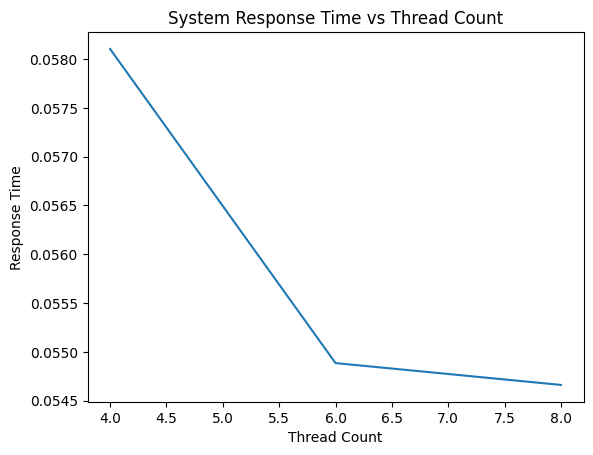

In [ ]:
n_threads = [4, 6, 8]
avg_response_times = np.zeros(3)

_, avg_response_times[0], _ = extract_data(df4)
_, avg_response_times[1], _ = extract_data(df6)
_, avg_response_times[2], _ = extract_data(df8)


fig, ax = plt.subplots()

ax.set_title("System Response Time vs Thread Count")
ax.set_xlabel("Thread Count")
ax.set_ylabel("Response Time")

ax.plot(n_threads, avg_response_times)


It seems like the decrease in response time slows down the more threads we add, according to the graph. However, we only have three data points, so it is hard to make a good conclusion.

In [ ]:
rejected_data = []
with open('output-d1.txt', 'r') as file:
    for line in file:
      row = line.strip().split(",")
      float_row = [float(x) for x in row]
      rejected_data.append(float_row)

rejected_df = pd.DataFrame(rejected_data, columns=["RequestID", "RejectedTimestamp"])

one_reject_rate = len(rejected_df["RequestID"]) / (rejected_df["RejectedTimestamp"].iloc[-1] - rejected_df["RejectedTimestamp"].iloc[0])
print(one_reject_rate)

0.8242320746391236


I didn't get any rejections using two worker threads, so according to my data the hypothesis of X/W is the rejection rate with W workers does not hold.